# **INSTALLING PACKAGES**

In [30]:
!pip install plotly -q
!pip install geopandas -q

# **IMPORTING LIBARIES AND DATA**

In [31]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
import plotly.express as px
import plotly.graph_objects as go
import geopandas as gpd
# Configure display settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10
# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ Libraries imported successfully!")

✓ Libraries imported successfully!


In [61]:
#  loading dataset
encodings_to_try = ['latin-1', 'iso-8859-1', 'cp1252', 'utf-16']

df = None
for encoding in encodings_to_try:
    try:
        df = pd.read_csv(file_path, encoding=encoding)
        print(f" Successfully loaded with encoding: {encoding}")
        break
    except Exception as e:
        print(f" Failed with {encoding}: {str(e)[:50]}")
        continue

if df is not None:
    print("DATASET LOADED SUCCESSFULLY")
    print(f"\nDataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")

else:
    print("\n Could not load the file with any encoding. Please check the file.")

 Successfully loaded with encoding: latin-1
DATASET LOADED SUCCESSFULLY

Dataset Shape: 236 rows × 84 columns


In [5]:
print(df.head())

     ID                                               name  \
0  4993  An Unknown Group of Hackers Gained Access to U...   
1  4947  Unknown Threat Actors Breach Nearly 80 Public ...   
2  4940  CL0P Ransomware Gang Conducted An Extortion Ca...   
3  4935  Unattributed Hackers Leveraged Malware To Stea...   
4  4870  Unknown Threat Actors Breached South Lyon Scho...   

                                         description  start_date  \
0  The University of Pennsylvania (UPenn) in Phil...  10/30/2025   
1  On 10 October 2025, an unknown threat actor ta...  10/10/2025   
2  On 11 July 2025, the CL0P ransomware gang star...   7/10/2025   
3  Unidentified hackers leveraged WhatsApp to tar...   10/1/2025   
4  On 15 September 2025, South Lyon Schools' comp...   9/15/2025   

        end_date                                 inclusion_criteria  \
0  Not available        Attack on critical infrastructure target(s)   
1     10/10/2025  Attack on (inter alia) political target(s), no...   
2    

# **DATASET INSPECTION**

In [6]:

print("DATASET INFORMATION")
print(f"\nTotal Records: {df.shape[0]}")
print(f"Total Features: {df.shape[1]}")
print("\n" + "-" * 80)
print("COLUMN NAMES AND DATA TYPES")
print(df.dtypes)

DATASET INFORMATION

Total Records: 236
Total Features: 84

--------------------------------------------------------------------------------
COLUMN NAMES AND DATA TYPES
ID                                                 object
name                                               object
description                                        object
start_date                                         object
end_date                                           object
inclusion_criteria                                 object
inclusion_criteria_subcode                         object
source_incident_detection_disclosure               object
incident_type                                      object
receiver_name                                      object
receiver_country                                   object
receiver_region                                    object
receiver_category                                  object
receiver_category_subcode                          object
initiator_name     

In [7]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Missing_Percentage': missing_percentage.values
})

# Filter columns with missing values
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

print(f"\nColumns with Missing Values: {len(missing_df)} out of {df.shape[1]}")
print("\nTop 20 Columns with Most Missing Data:")
print(missing_df.head(20).to_string(index=False))


Columns with Missing Values: 81 out of 84

Top 20 Columns with Most Missing Data:
                             Column  Missing_Count  Missing_Percentage
        legal_response_type_subcode            236          100.000000
                         casualties            236          100.000000
legal_attribution_reference_subcode            235           99.576271
                  zero_days_subcode            230           97.457627
                    economic_impact            228           96.610169
 offline_conflict_intensity_subcode            220           93.220339
     offline_conflict_issue_subcode            215           91.101695
    political_response_type_subcode            213           90.254237
            political_response_date            204           86.440678
         inclusion_criteria_subcode            199           84.322034
                legal_response_date            187           79.237288
         initiator_category_subcode            159           67.3

In [8]:
key_columns = ['incident_type', 'receiver_category', 'initiator_category',
               'has_disruption', 'data_theft', 'status']

for col in key_columns:
    if col in df.columns:
        print(f"\n{col}:")
        print(f"  Unique values: {df[col].nunique()}")
        print(f"  Top 5 values:\n{df[col].value_counts().head()}")
        print("-" * 80)


incident_type:
  Unique values: 22
  Top 5 values:
incident_type
Data theft; Hijacking with Misuse                            45
Disruption; Hijacking with Misuse; Ransomware                34
Disruption; Hijacking with Misuse                            27
Data theft; Disruption; Hijacking with Misuse; Ransomware    22
Hijacking without Misuse                                     19
Name: count, dtype: int64
--------------------------------------------------------------------------------

receiver_category:
  Unique values: 77
  Top 5 values:
receiver_category
State institutions / political system; Education                              87
State institutions / political system; Critical infrastructure; Education     44
Critical infrastructure; Education                                            15
Education                                                                     12
Critical infrastructure - State institutions / political system; Education     2
Name: count, dtype: int64
--

# **IMPUTATION **

In [10]:
df_imputed = df.copy()
# 1. Impute 'Not available' and 'Unknown' for object columns with high missing rates
categorical_cols_to_impute = [
    'end_date', 'inclusion_criteria_subcode', 'initiator_name',
    'initiator_country', 'initiator_category_subcode', 'attribution_type',
    'attribution_basis', 'attributing_actor', 'attribution_it_company',
    'attributing_country', 'attributed_initiator', 'attributed_initiator_country',
    'attributed_initiator_category', 'sources_attribution', 'cyber_conflict_issue',
    'offline_conflict_issue', 'offline_conflict_issue_subcode',
    'offline_conflict_intensity', 'offline_conflict_intensity_subcode',
    'political_response_date', 'political_response_type',
    'political_response_type_subcode', 'political_response_country',
    'political_response_actor', 'zero_days', 'zero_days_subcode',
    'MITRE_initial_access', 'MITRE_impact', 'user_interaction'
]

for col in categorical_cols_to_impute:
    if col in df_imputed.columns:
        df_imputed[col].fillna('Not available', inplace=True)

print("✓ Categorical columns imputed with 'Not available'")

# 2. Impute boolean-like columns
boolean_cols = ['has_disruption']
for col in boolean_cols:
    if col in df_imputed.columns:
        df_imputed[col].fillna('FALSE', inplace=True)

print("✓ Boolean columns imputed")

# 3. Impute disruption, hijacking, and impact columns
impact_cols = ['disruption', 'hijacking', 'data_theft', 'functional_impact',
               'intelligence_impact', 'political_impact_affected_entities',
               'political_impact_third_countries', 'economic_impact']

for col in impact_cols:
    if col in df_imputed.columns:
        df_imputed[col].fillna('Not available', inplace=True)

print("✓ Impact-related columns imputed")

✓ Categorical columns imputed with 'Not available'
✓ Boolean columns imputed
✓ Impact-related columns imputed


In [11]:
# 4. Impute numeric columns with 0 (these represent counts/measurements)
numeric_cols_zero = [
    'number_of_political_responses', 'number_of_legal_responses',
    'impact_indicator_value', 'political_impact_affected_entities_exact_value',
    'political_impact_third_countries_exact_value', 'economic_impact_exact_value'
]

for col in numeric_cols_zero:
    if col in df_imputed.columns:
        df_imputed[col].fillna(0, inplace=True)

print("✓ Numeric count columns imputed with 0")

# 5. Impute spatial/temporal effects
effect_cols = ['physical_effects_spatial', 'physical_effects_temporal']
for col in effect_cols:
    if col in df_imputed.columns:
        df_imputed[col].fillna('none', inplace=True)

print("✓ Physical effects columns imputed")

# 6. Impute legal and state responsibility indicators
legal_state_cols = [
    'state_responsibility_indicator', 'IL_breach_indicator',
    'IL_breach_indicator_subcode', 'evidence_for_sanctions_indicator',
    'legal_response_type', 'legal_response_type_subcode',
    'legal_response_country', 'legal_response_actor',
    'legal_attribution_reference', 'legal_attribution_reference_subcode',
    'legal_response_indicator', 'legal_response_date'
]

for col in legal_state_cols:
    if col in df_imputed.columns:
        df_imputed[col].fillna('Not available', inplace=True)

print("✓ Legal and state responsibility columns imputed")

# 7. Impute remaining columns
df_imputed['casualties'].fillna(0, inplace=True)
df_imputed['economic_impact_currency'].fillna('Not available', inplace=True)
df_imputed['impact_indicator'].fillna('Not available', inplace=True)
df_imputed['target_multiplier'].fillna('Not available', inplace=True)
df_imputed['weighted_cyber_intensity'].fillna(0, inplace=True)

print("✓ Remaining columns imputed")


✓ Numeric count columns imputed with 0
✓ Physical effects columns imputed
✓ Legal and state responsibility columns imputed
✓ Remaining columns imputed


In [12]:
# Check missing values after imputation

missing_after = df_imputed.isnull().sum()
missing_after_df = pd.DataFrame({
    'Column': missing_after.index,
    'Missing_Count': missing_after.values
})

missing_after_df = missing_after_df[missing_after_df['Missing_Count'] > 0]

if len(missing_after_df) == 0:
    print("\n✓ SUCCESS! No missing values remaining in the dataset!")
else:
    print(f"\nColumns still with missing values: {len(missing_after_df)}")
    print(missing_after_df.to_string(index=False))

print(f"\nTotal missing values before: {df.isnull().sum().sum()}")
print(f"Total missing values after: {df_imputed.isnull().sum().sum()}")
print(f"Missing values handled: {df.isnull().sum().sum() - df_imputed.isnull().sum().sum()}")


Columns still with missing values: 18
                              Column  Missing_Count
                          start_date              2
                  inclusion_criteria              1
source_incident_detection_disclosure              9
                       incident_type              1
                       receiver_name             24
                    receiver_country              1
                     receiver_region              7
                   receiver_category              1
           receiver_category_subcode             13
                  initiator_category              4
              number_of_attributions              1
                      attribution_ID              1
                    attribution_date              1
          unweighted_cyber_intensity              1
                         sources_url              3
                         added_to_DB              3
                          updated_at              3
                         

In [13]:
# Handle the remaining missing values
print("=" * 80)
print("HANDLING REMAINING MISSING VALUES")
print("=" * 80)

# For critical columns, use appropriate defaults
if df_imputed['start_date'].isnull().sum() > 0:
    df_imputed['start_date'].fillna('Not available', inplace=True)
    print("✓ start_date imputed")

if df_imputed['inclusion_criteria'].isnull().sum() > 0:
    df_imputed['inclusion_criteria'].fillna('Not available', inplace=True)
    print("✓ inclusion_criteria imputed")

if df_imputed['source_incident_detection_disclosure'].isnull().sum() > 0:
    df_imputed['source_incident_detection_disclosure'].fillna('Not available', inplace=True)
    print("✓ source_incident_detection_disclosure imputed")

if df_imputed['incident_type'].isnull().sum() > 0:
    df_imputed['incident_type'].fillna('Not available', inplace=True)
    print("✓ incident_type imputed")

if df_imputed['receiver_name'].isnull().sum() > 0:
    df_imputed['receiver_name'].fillna('Not available', inplace=True)
    print("✓ receiver_name imputed")

if df_imputed['receiver_country'].isnull().sum() > 0:
    df_imputed['receiver_country'].fillna('Not available', inplace=True)
    print("✓ receiver_country imputed")

if df_imputed['receiver_region'].isnull().sum() > 0:
    df_imputed['receiver_region'].fillna('Not available', inplace=True)
    print("✓ receiver_region imputed")

if df_imputed['receiver_category'].isnull().sum() > 0:
    df_imputed['receiver_category'].fillna('Not available', inplace=True)
    print("✓ receiver_category imputed")

if df_imputed['receiver_category_subcode'].isnull().sum() > 0:
    df_imputed['receiver_category_subcode'].fillna('Not available', inplace=True)
    print("✓ receiver_category_subcode imputed")

if df_imputed['initiator_category'].isnull().sum() > 0:
    df_imputed['initiator_category'].fillna('Not available', inplace=True)
    print("✓ initiator_category imputed")

if df_imputed['number_of_attributions'].isnull().sum() > 0:
    df_imputed['number_of_attributions'].fillna('0', inplace=True)
    print("✓ number_of_attributions imputed")

if df_imputed['attribution_ID'].isnull().sum() > 0:
    df_imputed['attribution_ID'].fillna('Not available', inplace=True)
    print("✓ attribution_ID imputed")

if df_imputed['attribution_date'].isnull().sum() > 0:
    df_imputed['attribution_date'].fillna('Not available', inplace=True)
    print("✓ attribution_date imputed")

if df_imputed['unweighted_cyber_intensity'].isnull().sum() > 0:
    df_imputed['unweighted_cyber_intensity'].fillna(0, inplace=True)
    print("✓ unweighted_cyber_intensity imputed")

if df_imputed['sources_url'].isnull().sum() > 0:
    df_imputed['sources_url'].fillna('Not available', inplace=True)
    print("✓ sources_url imputed")

if df_imputed['added_to_DB'].isnull().sum() > 0:
    df_imputed['added_to_DB'].fillna('Not available', inplace=True)
    print("✓ added_to_DB imputed")

if df_imputed['updated_at'].isnull().sum() > 0:
    df_imputed['updated_at'].fillna('Not available', inplace=True)
    print("✓ updated_at imputed")

if df_imputed['status'].isnull().sum() > 0:
    df_imputed['status'].fillna('Open', inplace=True)
    print("✓ status imputed")

print("\n" + "=" * 80)
print("FINAL VERIFICATION")
print("=" * 80)
print(f"Total missing values: {df_imputed.isnull().sum().sum()}")

HANDLING REMAINING MISSING VALUES
✓ start_date imputed
✓ inclusion_criteria imputed
✓ source_incident_detection_disclosure imputed
✓ incident_type imputed
✓ receiver_name imputed
✓ receiver_country imputed
✓ receiver_region imputed
✓ receiver_category imputed
✓ receiver_category_subcode imputed
✓ initiator_category imputed
✓ number_of_attributions imputed
✓ attribution_ID imputed
✓ attribution_date imputed
✓ unweighted_cyber_intensity imputed
✓ sources_url imputed
✓ added_to_DB imputed
✓ updated_at imputed
✓ status imputed

FINAL VERIFICATION
Total missing values: 0


In [14]:
# Convert data types for better analysis

# Convert numeric columns
numeric_columns = [
    'number_of_attributions', 'number_of_political_responses',
    'number_of_legal_responses', 'impact_indicator_value',
    'political_impact_affected_entities_exact_value',
    'political_impact_third_countries_exact_value',
    'economic_impact_exact_value', 'casualties'
]

for col in numeric_columns:
    if col in df_imputed.columns:
        df_imputed[col] = pd.to_numeric(df_imputed[col], errors='coerce').fillna(0)

print("✓ Numeric columns converted")

# Convert weighted_cyber_intensity
if 'weighted_cyber_intensity' in df_imputed.columns:
    df_imputed['weighted_cyber_intensity'] = pd.to_numeric(
        df_imputed['weighted_cyber_intensity'], errors='coerce'
    ).fillna(0)

print("✓ Weighted cyber intensity converted")

# Parse dates (handle multiple date formats)
date_columns = ['start_date', 'end_date', 'added_to_DB', 'updated_at']

for col in date_columns:
    if col in df_imputed.columns:
        try:
            # Try parsing with different formats
            df_imputed[col] = pd.to_datetime(df_imputed[col], errors='coerce')
            print(f"✓ {col} parsed as datetime")
        except:
            print(f"⚠ {col} could not be fully parsed")



✓ Numeric columns converted
✓ Weighted cyber intensity converted
✓ start_date parsed as datetime
✓ end_date parsed as datetime
✓ added_to_DB parsed as datetime
✓ updated_at parsed as datetime


In [15]:
# Generate detailed statistics


print(f"Total Incidents: {len(df_imputed)}")
print(f"Total Features: {df_imputed.shape[1]}")
print(f"Memory Usage: {df_imputed.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


valid_start_dates = df_imputed['start_date'][df_imputed['start_date'].notna()]
if len(valid_start_dates) > 0:
    print(f"Earliest Incident: {valid_start_dates.min()}")
    print(f"Latest Incident: {valid_start_dates.max()}")
    print(f"Date Range: {(valid_start_dates.max() - valid_start_dates.min()).days} days")


numeric_stats = df_imputed[['unweighted_cyber_intensity', 'weighted_cyber_intensity',
                             'number_of_attributions', 'number_of_political_responses',
                             'number_of_legal_responses']].describe()
print(numeric_stats)


print(df_imputed['incident_type'].value_counts().head(10))


print(f"Top 10 Affected Countries:")
print(df_imputed['receiver_country'].value_counts().head(10))

Total Incidents: 236
Total Features: 84
Memory Usage: 1.65 MB
Earliest Incident: 2009-01-01 00:00:00
Latest Incident: 2025-10-30 00:00:00
Date Range: 6146 days
       unweighted_cyber_intensity  weighted_cyber_intensity  \
count                  236.000000                236.000000   
mean                     3.084746                  3.055085   
std                      1.530269                  1.555066   
min                      0.000000                  0.000000   
25%                      2.000000                  2.000000   
50%                      3.000000                  3.000000   
75%                      4.000000                  4.000000   
max                      6.000000                  6.000000   

       number_of_attributions  number_of_political_responses  \
count              236.000000                     236.000000   
mean                 1.063559                       0.152542   
std                  0.306293                       0.425308   
min             

In [16]:
print(df_imputed['initiator_category'].value_counts().head(10))
print(df_imputed['initiator_name'].value_counts().head(10))
print(df_imputed['receiver_region'].value_counts().head(10))
print(df_imputed['receiver_category'].value_counts().head(10))
print(df_imputed['has_disruption'].value_counts())
print(df_imputed['data_theft'].value_counts().head(5))

initiator_category
Not available                                                                                 123
Non-state-group                                                                                67
Non-state actor, state-affiliation suggested                                                   22
Unknown - not attributed                                                                       11
Individual hacker(s)                                                                            2
Not available; Not available                                                                    2
Non-state-group; Non-state-group                                                                2
State                                                                                           2
Non-state actor, state-affiliation suggested; Non-state actor, state-affiliation suggested      1
State; State; Non-state actor, state-affiliation suggested                                      1
N

In [17]:

print(df_imputed['attribution_type'].value_counts().head(10))

print(df_imputed['attribution_basis'].value_counts().head(10))

print(df_imputed['attributed_initiator'].value_counts().head(10))

print(f"Total incidents with political response: {(df_imputed['number_of_political_responses'] > 0).sum()}")
print(f"Average political responses per incident: {df_imputed['number_of_political_responses'].mean():.2f}")


print(f"Total incidents with legal response: {(df_imputed['number_of_legal_responses'] > 0).sum()}")
print(f"Average legal responses per incident: {df_imputed['number_of_legal_responses'].mean():.2f}")

print(df_imputed['status'].value_counts())

attribution_type
Not available                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [18]:
print(f"\nUnweighted Cyber Intensity Distribution:")
print(df_imputed['unweighted_cyber_intensity'].value_counts().sort_index())
print(f"\nWeighted Cyber Intensity Distribution:")
print(df_imputed['weighted_cyber_intensity'].value_counts().sort_index())
print(f"\nMITRE Initial Access Methods:")
print(df_imputed['MITRE_initial_access'].value_counts().head(10))
print(f"\nMITRE Impact Types:")
print(df_imputed['MITRE_impact'].value_counts().head(10))
print(df_imputed['zero_days'].value_counts())
# Save the cleaned dataset
df_imputed.to_csv('/content/cleaned_cybersecurity_data.csv', index=False)
print("\n✓ Cleaned dataset saved as: 'cleaned_cybersecurity_data.csv'")


Unweighted Cyber Intensity Distribution:
unweighted_cyber_intensity
0.0    17
1.0    33
2.0    19
3.0    52
4.0    79
5.0    31
6.0     5
Name: count, dtype: int64

Weighted Cyber Intensity Distribution:
weighted_cyber_intensity
0.0    19
1.0    33
2.0    19
3.0    51
4.0    78
5.0    31
6.0     5
Name: count, dtype: int64

MITRE Initial Access Methods:
MITRE_initial_access
Not available                                                                        188
Exploit Public-Facing Application                                                     16
Phishing                                                                              10
Valid Accounts                                                                         8
Exploit Public-Facing Application; Phishing                                            3
Drive-By Compromise; Phishing                                                          2
External Remote Services                                                               2

In [22]:
# Create time-based columns
df_imputed['year'] = df_imputed['start_date'].dt.year
df_imputed['month'] = df_imputed['start_date'].dt.month
df_imputed['year_month'] = df_imputed['start_date'].dt.to_period('M')

# Remove any NaT or invalid entries for visualization
df_viz = df_imputed[df_imputed['year'].notna()].copy()

print(f"✓ Time columns created successfully!")
print(f"✓ Valid records for visualization: {len(df_viz)} out of {len(df_imputed)}")
print(f"✓ Date range: {df_viz['year'].min():.0f} to {df_viz['year'].max():.0f}")

✓ Time columns created successfully!
✓ Valid records for visualization: 232 out of 236
✓ Date range: 2009 to 2025


# **EDA AND VISUALISATION**

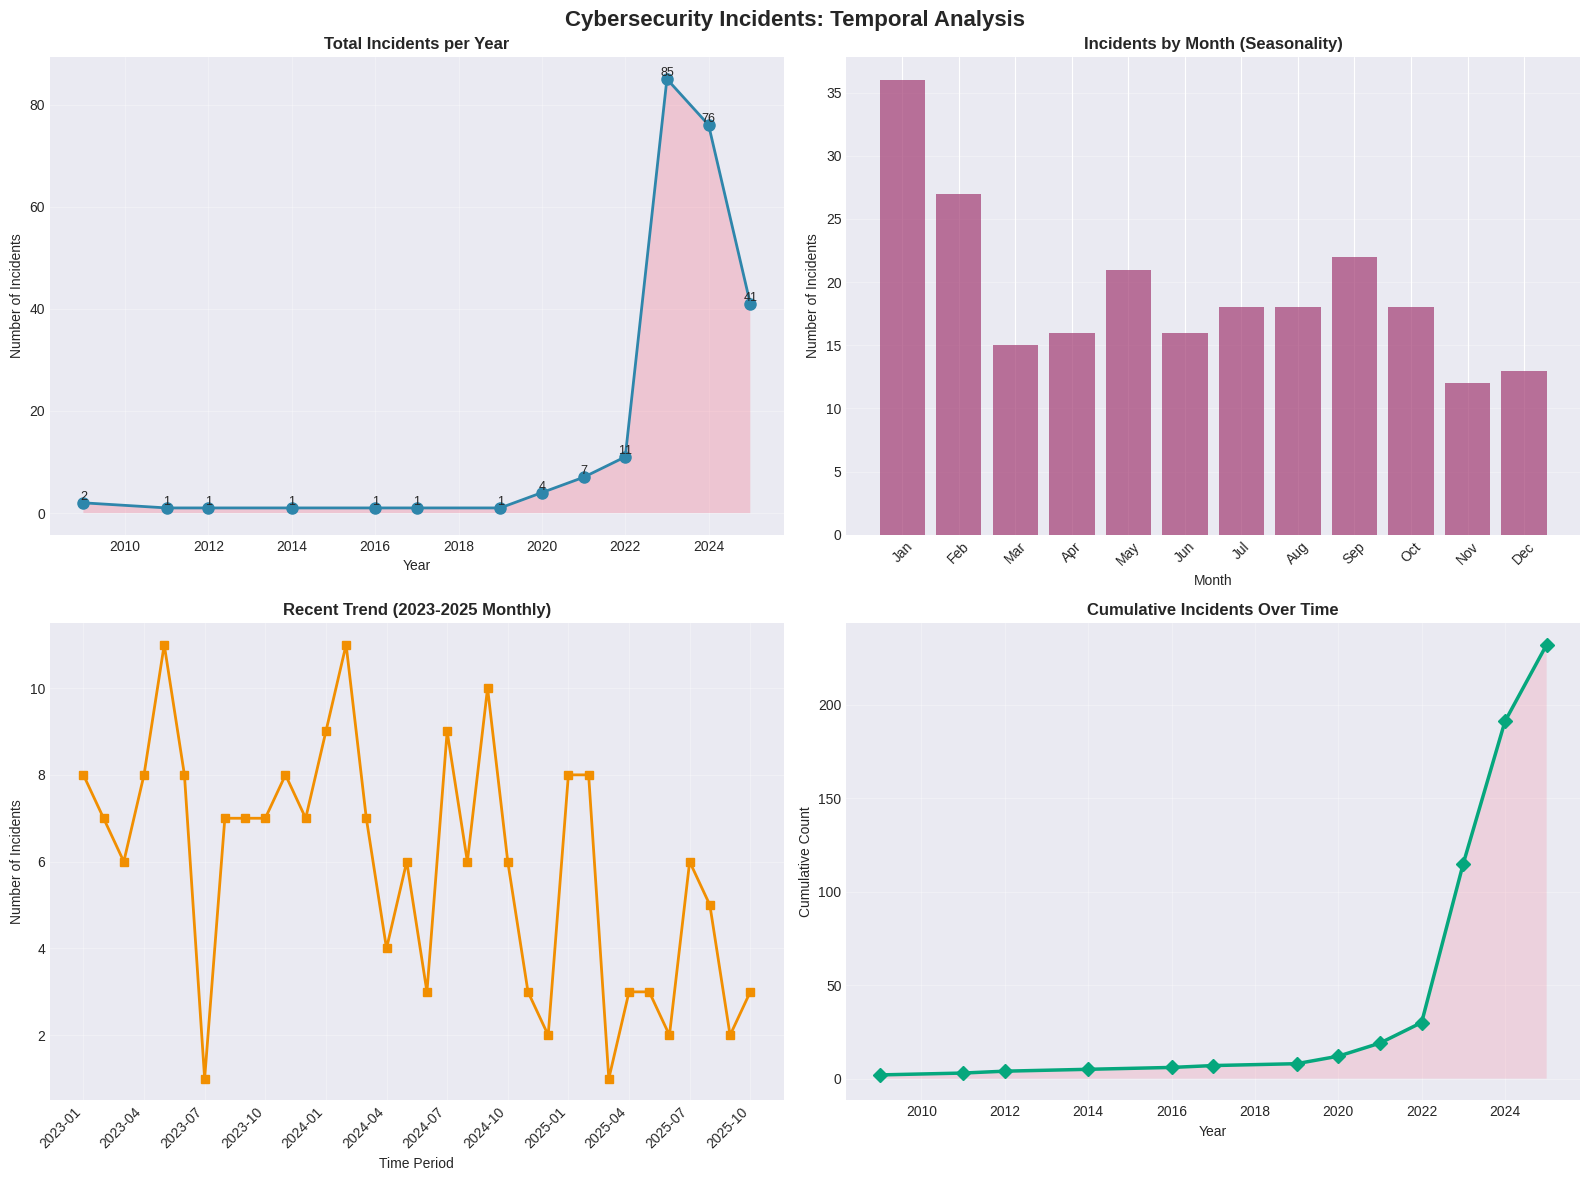


✓ Visualization 1 completed!


In [23]:
# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Cybersecurity Incidents: Temporal Analysis', fontsize=16, fontweight='bold')

# 1. Incidents by Year
incidents_by_year = df_viz['year'].value_counts().sort_index()
axes[0, 0].plot(incidents_by_year.index, incidents_by_year.values,
                marker='o', linewidth=2, markersize=8, color='#2E86AB')
axes[0, 0].fill_between(incidents_by_year.index, incidents_by_year.values, alpha=0.3)
axes[0, 0].set_title('Total Incidents per Year', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Number of Incidents')
axes[0, 0].grid(True, alpha=0.3)

# Add value labels
for x, y in zip(incidents_by_year.index, incidents_by_year.values):
    axes[0, 0].text(x, y, str(int(y)), ha='center', va='bottom', fontsize=9)

# 2. Incidents by Month (Seasonality)
incidents_by_month = df_viz['month'].value_counts().sort_index()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
axes[0, 1].bar(incidents_by_month.index, incidents_by_month.values, color='#A23B72', alpha=0.7)
axes[0, 1].set_title('Incidents by Month (Seasonality)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Number of Incidents')
axes[0, 1].set_xticks(range(1, 13))
axes[0, 1].set_xticklabels(month_names, rotation=45)
axes[0, 1].grid(True, alpha=0.3, axis='y')

# 3. Recent Trend (Last 3 years)
recent_data = df_viz[df_viz['year'] >= 2023]
if len(recent_data) > 0:
    recent_monthly = recent_data.groupby('year_month').size()
    axes[1, 0].plot(range(len(recent_monthly)), recent_monthly.values,
                    marker='s', linewidth=2, markersize=6, color='#F18F01')
    axes[1, 0].set_title('Recent Trend (2023-2025 Monthly)', fontsize=12, fontweight='bold')
    axes[1, 0].set_xlabel('Time Period')
    axes[1, 0].set_ylabel('Number of Incidents')
    axes[1, 0].set_xticks(range(0, len(recent_monthly), 3))
    axes[1, 0].set_xticklabels([str(recent_monthly.index[i]) for i in range(0, len(recent_monthly), 3)],
                               rotation=45, ha='right')
    axes[1, 0].grid(True, alpha=0.3)

# 4. Cumulative Incidents Over Time
cumulative = incidents_by_year.cumsum()
axes[1, 1].plot(cumulative.index, cumulative.values,
                marker='D', linewidth=2.5, markersize=7, color='#06A77D')
axes[1, 1].fill_between(cumulative.index, cumulative.values, alpha=0.2)
axes[1, 1].set_title('Cumulative Incidents Over Time', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Cumulative Count')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Visualization 1 completed!")

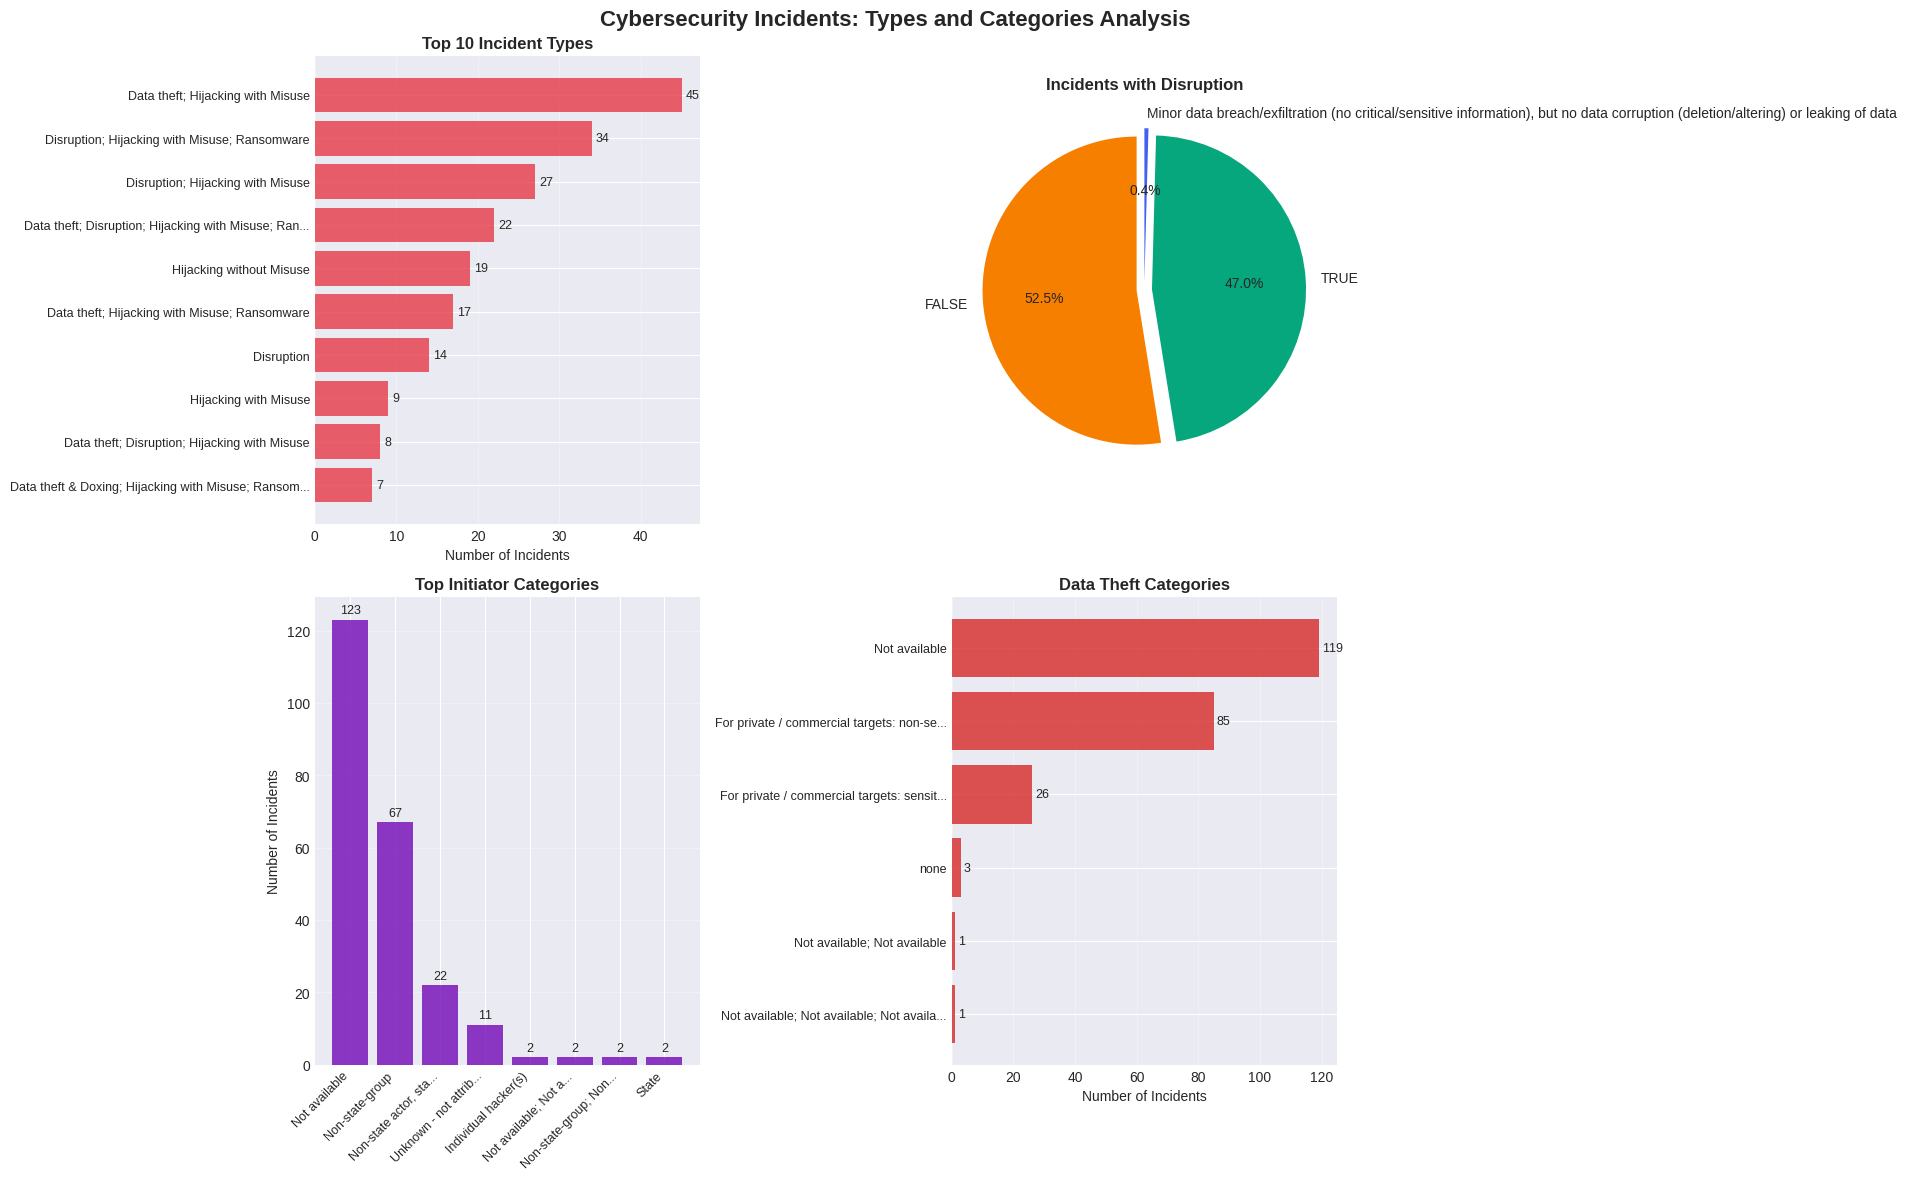

In [24]:
# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Cybersecurity Incidents: Types and Categories Analysis',
             fontsize=16, fontweight='bold')

# 1. Top 10 Incident Types
incident_types = df_imputed['incident_type'].value_counts().head(10)
axes[0, 0].barh(range(len(incident_types)), incident_types.values, color='#E63946', alpha=0.8)
axes[0, 0].set_yticks(range(len(incident_types)))
axes[0, 0].set_yticklabels([label[:50] + '...' if len(label) > 50 else label
                            for label in incident_types.index], fontsize=9)
axes[0, 0].set_xlabel('Number of Incidents')
axes[0, 0].set_title('Top 10 Incident Types', fontsize=12, fontweight='bold')
axes[0, 0].invert_yaxis()
axes[0, 0].grid(True, alpha=0.3, axis='x')

# Add value labels
for i, v in enumerate(incident_types.values):
    axes[0, 0].text(v + 0.5, i, str(v), va='center', fontsize=9)

# 2. Disruption Status
disruption_data = df_imputed['has_disruption'].value_counts()
colors_disruption = ['#F77F00', '#06A77D', '#4361EE']
axes[0, 1].pie(disruption_data.values, labels=disruption_data.index, autopct='%1.1f%%',
               startangle=90, colors=colors_disruption, explode=[0.05] * len(disruption_data))
axes[0, 1].set_title('Incidents with Disruption', fontsize=12, fontweight='bold')

# 3. Initiator Categories
initiator_cat = df_imputed['initiator_category'].value_counts().head(8)
axes[1, 0].bar(range(len(initiator_cat)), initiator_cat.values,
               color='#7209B7', alpha=0.8)
axes[1, 0].set_xticks(range(len(initiator_cat)))
axes[1, 0].set_xticklabels([label[:20] + '...' if len(label) > 20 else label
                            for label in initiator_cat.index],
                           rotation=45, ha='right', fontsize=9)
axes[1, 0].set_ylabel('Number of Incidents')
axes[1, 0].set_title('Top Initiator Categories', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Add value labels
for i, v in enumerate(initiator_cat.values):
    axes[1, 0].text(i, v + 1, str(v), ha='center', va='bottom', fontsize=9)

# 4. Data Theft Analysis
data_theft_status = df_imputed['data_theft'].value_counts().head(6)
axes[1, 1].barh(range(len(data_theft_status)), data_theft_status.values,
                color='#D62828', alpha=0.8)
axes[1, 1].set_yticks(range(len(data_theft_status)))
axes[1, 1].set_yticklabels([label[:40] + '...' if len(label) > 40 else label
                            for label in data_theft_status.index], fontsize=9)
axes[1, 1].set_xlabel('Number of Incidents')
axes[1, 1].set_title('Data Theft Categories', fontsize=12, fontweight='bold')
axes[1, 1].invert_yaxis()
axes[1, 1].grid(True, alpha=0.3, axis='x')

# Add value labels
for i, v in enumerate(data_theft_status.values):
    axes[1, 1].text(v + 1, i, str(v), va='center', fontsize=9)

plt.tight_layout()
plt.show()

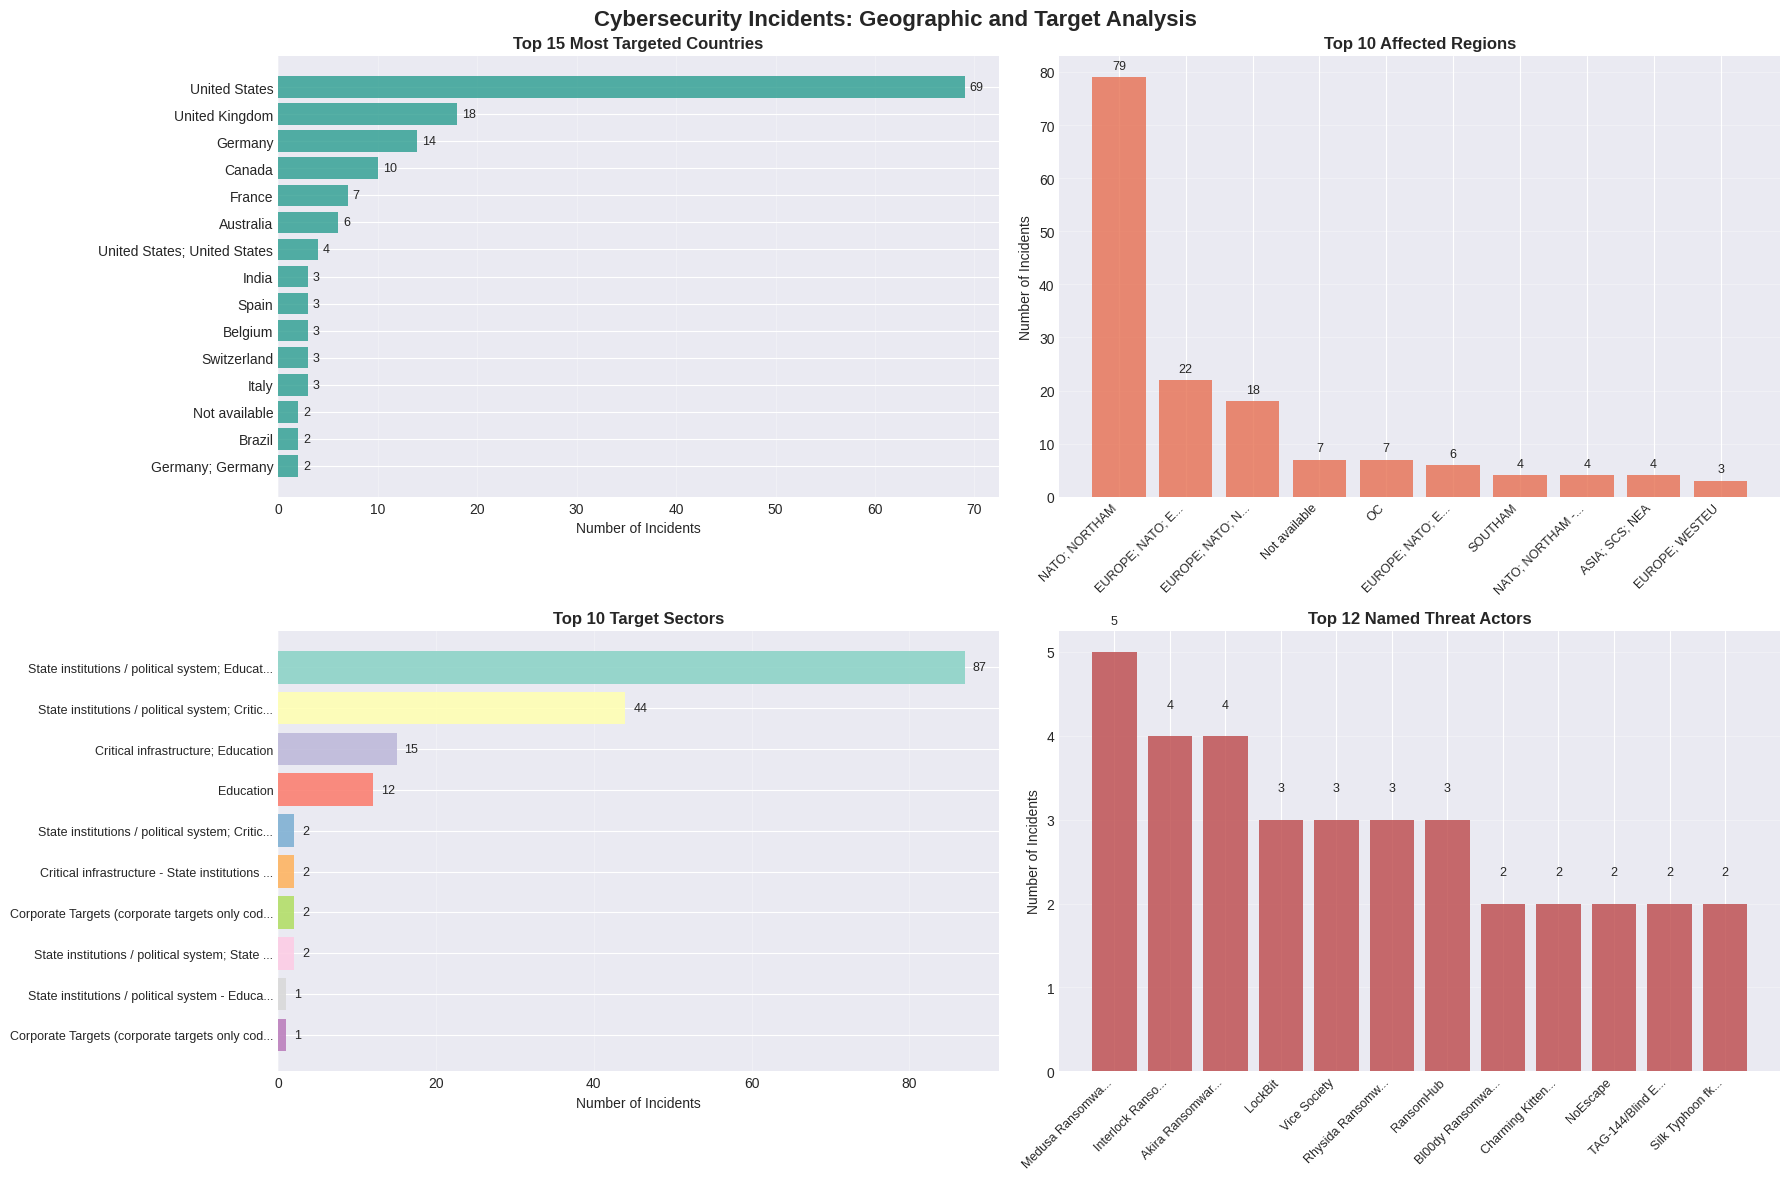

In [25]:
# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Cybersecurity Incidents: Geographic and Target Analysis',
             fontsize=16, fontweight='bold')

# 1. Top 15 Affected Countries
top_countries = df_imputed['receiver_country'].value_counts().head(15)
axes[0, 0].barh(range(len(top_countries)), top_countries.values,
                color='#2A9D8F', alpha=0.8)
axes[0, 0].set_yticks(range(len(top_countries)))
axes[0, 0].set_yticklabels(top_countries.index, fontsize=10)
axes[0, 0].set_xlabel('Number of Incidents')
axes[0, 0].set_title('Top 15 Most Targeted Countries', fontsize=12, fontweight='bold')
axes[0, 0].invert_yaxis()
axes[0, 0].grid(True, alpha=0.3, axis='x')

# Add value labels
for i, v in enumerate(top_countries.values):
    axes[0, 0].text(v + 0.5, i, str(v), va='center', fontsize=9)

# 2. Regional Distribution
region_data = df_imputed['receiver_region'].value_counts().head(10)
axes[0, 1].bar(range(len(region_data)), region_data.values,
               color='#E76F51', alpha=0.8)
axes[0, 1].set_xticks(range(len(region_data)))
axes[0, 1].set_xticklabels([label[:15] + '...' if len(label) > 15 else label
                            for label in region_data.index],
                           rotation=45, ha='right', fontsize=9)
axes[0, 1].set_ylabel('Number of Incidents')
axes[0, 1].set_title('Top 10 Affected Regions', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Add value labels
for i, v in enumerate(region_data.values):
    axes[0, 1].text(i, v + 1, str(v), ha='center', va='bottom', fontsize=9)

# 3. Target Sectors/Categories
target_sectors = df_imputed['receiver_category'].value_counts().head(10)
colors_sectors = plt.cm.Set3(range(len(target_sectors)))
axes[1, 0].barh(range(len(target_sectors)), target_sectors.values,
                color=colors_sectors, alpha=0.9)
axes[1, 0].set_yticks(range(len(target_sectors)))
axes[1, 0].set_yticklabels([label[:45] + '...' if len(label) > 45 else label
                            for label in target_sectors.index], fontsize=9)
axes[1, 0].set_xlabel('Number of Incidents')
axes[1, 0].set_title('Top 10 Target Sectors', fontsize=12, fontweight='bold')
axes[1, 0].invert_yaxis()
axes[1, 0].grid(True, alpha=0.3, axis='x')

# Add value labels
for i, v in enumerate(target_sectors.values):
    axes[1, 0].text(v + 1, i, str(v), va='center', fontsize=9)

# 4. Top Named Attackers/Initiators (excluding "Not available")
top_attackers = df_imputed[df_imputed['initiator_name'] != 'Not available']['initiator_name'].value_counts().head(12)
axes[1, 1].bar(range(len(top_attackers)), top_attackers.values,
               color='#BC4749', alpha=0.8)
axes[1, 1].set_xticks(range(len(top_attackers)))
axes[1, 1].set_xticklabels([label[:15] + '...' if len(label) > 15 else label
                            for label in top_attackers.index],
                           rotation=45, ha='right', fontsize=9)
axes[1, 1].set_ylabel('Number of Incidents')
axes[1, 1].set_title('Top 12 Named Threat Actors', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')

# Add value labels
for i, v in enumerate(top_attackers.values):
    axes[1, 1].text(i, v + 0.3, str(v), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

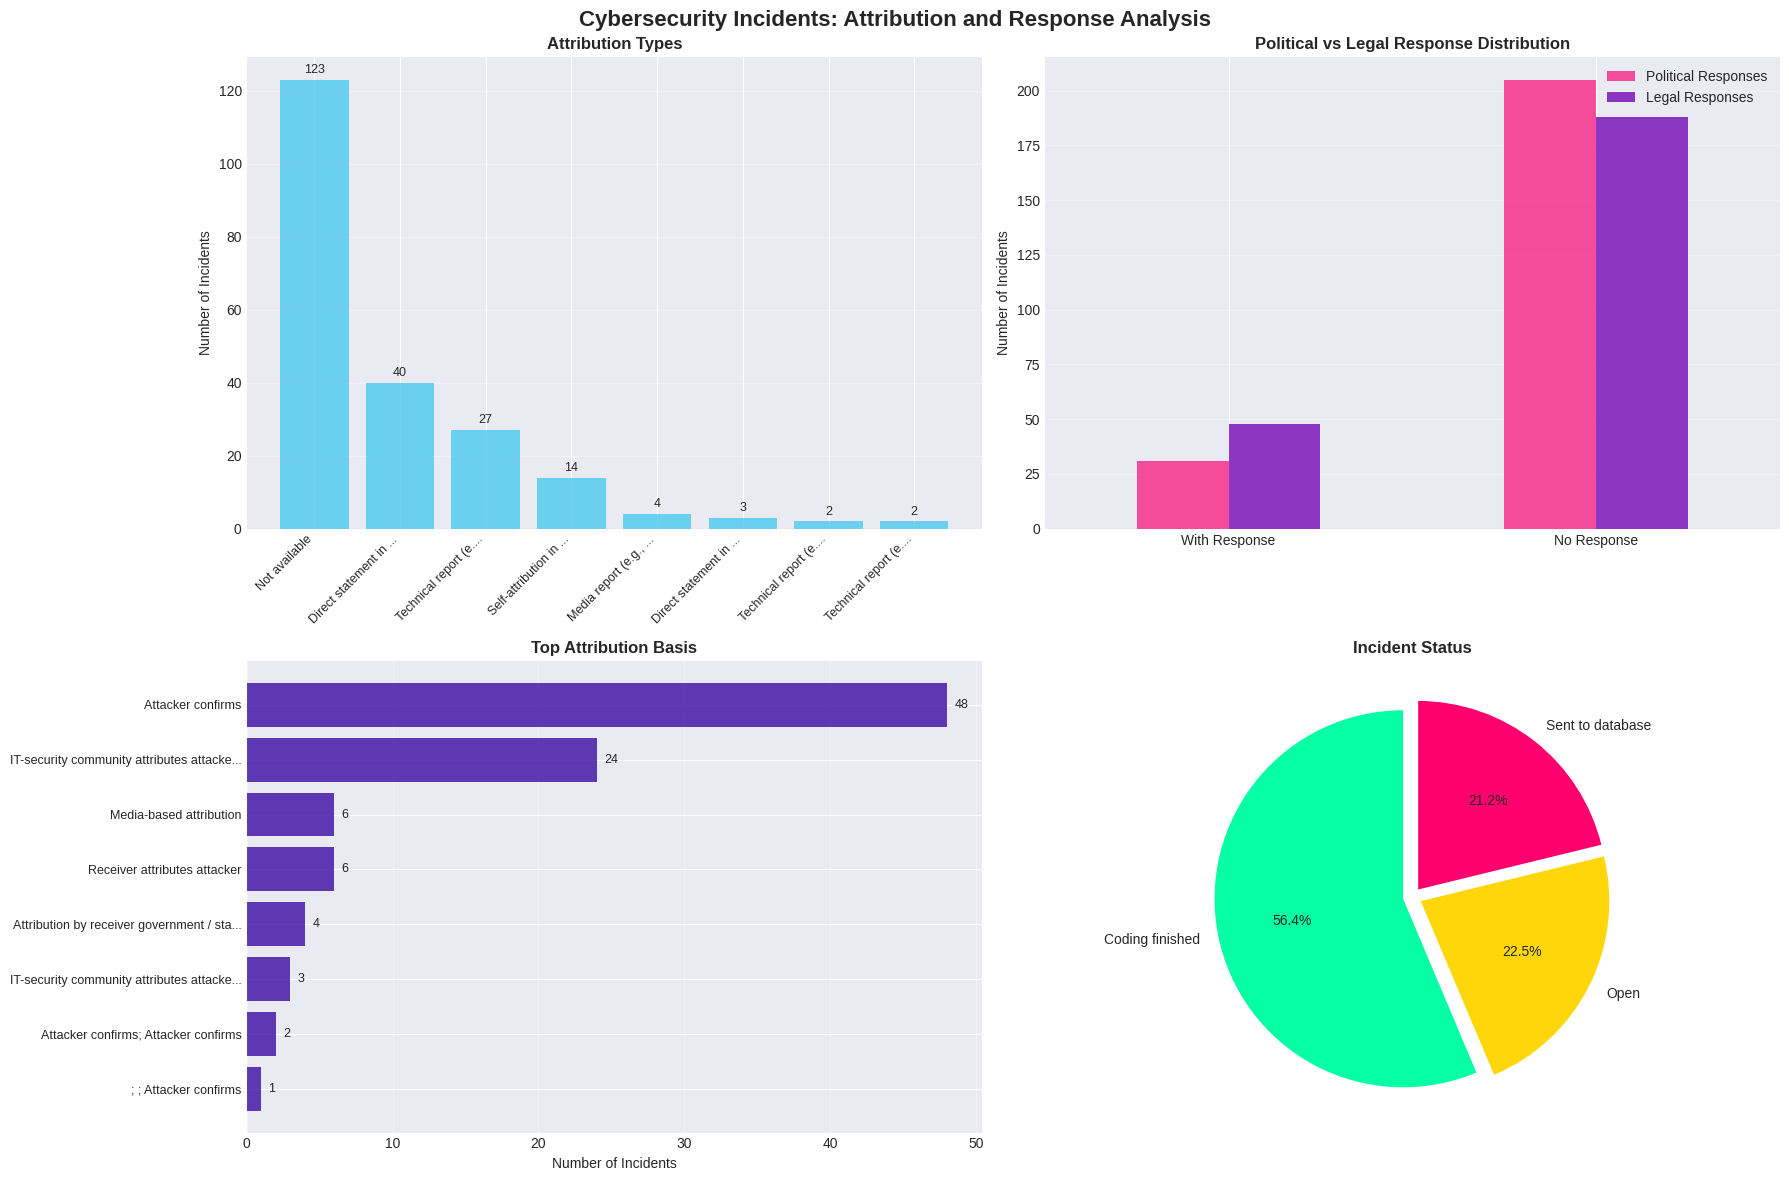

In [35]:
# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Cybersecurity Incidents: Attribution and Response Analysis',
             fontsize=16, fontweight='bold')

# 1. Attribution Types Distribution
attribution_types = df_imputed['attribution_type'].value_counts().head(8)
axes[0, 0].bar(range(len(attribution_types)), attribution_types.values,
               color='#4CC9F0', alpha=0.8)
axes[0, 0].set_xticks(range(len(attribution_types)))
axes[0, 0].set_xticklabels([label[:20] + '...' if len(label) > 20 else label
                            for label in attribution_types.index],
                           rotation=45, ha='right', fontsize=9)
axes[0, 0].set_ylabel('Number of Incidents')
axes[0, 0].set_title('Attribution Types', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Add value labels
for i, v in enumerate(attribution_types.values):
    axes[0, 0].text(i, v + 1, str(v), ha='center', va='bottom', fontsize=9)

# 2. Political vs Legal Responses
response_data = pd.DataFrame({
    'Political Responses': [
        (df_imputed['number_of_political_responses'] > 0).sum(),
        (df_imputed['number_of_political_responses'] == 0).sum()
    ],
    'Legal Responses': [
        (df_imputed['number_of_legal_responses'] > 0).sum(),
        (df_imputed['number_of_legal_responses'] == 0).sum()
    ]
}, index=['With Response', 'No Response'])

response_data.plot(kind='bar', ax=axes[0, 1], color=['#F72585', '#7209B7'], alpha=0.8)
axes[0, 1].set_title('Political vs Legal Response Distribution', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Number of Incidents')
axes[0, 1].set_xticklabels(['With Response', 'No Response'], rotation=0)
axes[0, 1].legend(loc='upper right')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# 3. Attribution Basis
attribution_basis = df_imputed[df_imputed['attribution_basis'] != 'Not available']['attribution_basis'].value_counts().head(8)
axes[1, 0].barh(range(len(attribution_basis)), attribution_basis.values,
                color='#3A0CA3', alpha=0.8)
axes[1, 0].set_yticks(range(len(attribution_basis)))
axes[1, 0].set_yticklabels([label[:40] + '...' if len(label) > 40 else label
                            for label in attribution_basis.index], fontsize=9)
axes[1, 0].set_xlabel('Number of Incidents')
axes[1, 0].set_title('Top Attribution Basis', fontsize=12, fontweight='bold')
axes[1, 0].invert_yaxis()
axes[1, 0].grid(True, alpha=0.3, axis='x')

# Add value labels
for i, v in enumerate(attribution_basis.values):
    axes[1, 0].text(v + 0.5, i, str(v), va='center', fontsize=9)

# 4. Incident Status Distribution
status_data = df_imputed['status'].value_counts()
colors_status = ['#06FFA5', '#FFD60A', '#FF006E']
axes[1, 1].pie(status_data.values, labels=status_data.index, autopct='%1.1f%%',
               startangle=90, colors=colors_status[:len(status_data)],
               explode=[0.05] * len(status_data))
axes[1, 1].set_title('Incident Status', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# **ANALYSIS**

In [52]:
# 1. Overall frequency analysis
total_incidents = len(df_imputed)
print(f"\n TOTAL INCIDENTS RECORDED: {total_incidents}")

incident_type_counts = df_imputed['incident_type'].value_counts()
print(f"\n UNIQUE INCIDENT TYPES: {df_imputed['incident_type'].nunique()}")
print(f"\nTop 10 Most Common Incident Types:")
print(incident_type_counts.head(10))


print(f"Average Unweighted Intensity: {df_imputed['unweighted_cyber_intensity'].mean():.2f}")
print(f"Average Weighted Intensity: {df_imputed['weighted_cyber_intensity'].mean():.2f}")
print(f"Max Intensity Level: {df_imputed['unweighted_cyber_intensity'].max():.0f}")

intensity_dist = df_imputed['unweighted_cyber_intensity'].value_counts().sort_index()
print(f"\nIntensity Level Distribution:")
print(intensity_dist)

# 4. Disruption and data theft frequency
disruption_count = df_imputed[df_imputed['has_disruption'] == 'TRUE'].shape[0]
disruption_pct = (disruption_count / total_incidents) * 100

print(f"Incidents with Disruption: {disruption_count} ({disruption_pct:.1f}%)")
data_theft_counts = df_imputed['data_theft'].value_counts()
print(data_theft_counts.head(5))

# 5. Temporal frequency
yearly_incidents = df_viz.groupby('year').size()
print(f"Average incidents per year: {yearly_incidents.mean():.1f}")
print(f"Peak year: {yearly_incidents.idxmax():.0f} with {yearly_incidents.max()} incidents")
print(f"Growth rate (first to last year): {((yearly_incidents.iloc[-1] - yearly_incidents.iloc[0]) / yearly_incidents.iloc[0] * 100):.1f}%")




 TOTAL INCIDENTS RECORDED: 236

 UNIQUE INCIDENT TYPES: 23

Top 10 Most Common Incident Types:
incident_type
Data theft; Hijacking with Misuse                            45
Disruption; Hijacking with Misuse; Ransomware                34
Disruption; Hijacking with Misuse                            27
Data theft; Disruption; Hijacking with Misuse; Ransomware    22
Hijacking without Misuse                                     19
Data theft; Hijacking with Misuse; Ransomware                17
Disruption                                                   14
Hijacking with Misuse                                         9
Data theft; Disruption; Hijacking with Misuse                 8
Data theft & Doxing; Hijacking with Misuse; Ransomware        7
Name: count, dtype: int64
Average Unweighted Intensity: 3.08
Average Weighted Intensity: 3.06
Max Intensity Level: 6

Intensity Level Distribution:
unweighted_cyber_intensity
0.0    17
1.0    33
2.0    19
3.0    52
4.0    79
5.0    31
6.0     5
Name:

In [51]:
# OBJECTIVE 2: Assess the Impact of Cybersecurity Incidents
# 1. Disruption Impact
disruption_yes = (df_imputed['has_disruption'] == 'TRUE').sum()
disruption_pct = (disruption_yes / len(df_imputed)) * 100

print(f"Incidents with Disruption: {disruption_yes} ({disruption_pct:.1f}%)")
print(f"\nDisruption Types:")
print(df_imputed['disruption'].value_counts().head(5))

# 2. Data Theft Impact
data_theft_impact = df_imputed[df_imputed['data_theft'] != 'Not available']['data_theft'].value_counts()
print(f"Total incidents with data theft: {data_theft_impact.sum()}")
print(data_theft_impact.head(5))

# 3. Functional, Intelligence, and Political Impact
functional_impact = df_imputed[df_imputed['functional_impact'] != 'Not available'].shape[0]
intelligence_impact = df_imputed[df_imputed['intelligence_impact'] != 'Not available'].shape[0]
political_impact = df_imputed[df_imputed['political_impact_affected_entities'] != 'Not available'].shape[0]
economic_impact = df_imputed[df_imputed['economic_impact'] != 'Not available'].shape[0]

print(f"Functional Impact: {functional_impact} incidents")
print(f"Intelligence Impact: {intelligence_impact} incidents")
print(f"Political Impact: {political_impact} incidents")
print(f"Economic Impact: {economic_impact} incidents")

# 4. Casualties
total_casualties = df_imputed['casualties'].sum()
incidents_with_casualties = (df_imputed['casualties'] > 0).sum()
print(f"Total casualties: {int(total_casualties)}")
print(f"Incidents with casualties: {incidents_with_casualties}")

# 5. Physical Effects
physical_spatial = df_imputed[df_imputed['physical_effects_spatial'] != 'none'].shape[0]
physical_temporal = df_imputed[df_imputed['physical_effects_temporal'] != 'none'].shape[0]
print(f"Spatial effects: {physical_spatial} incidents")
print(f"Temporal effects: {physical_temporal} incidents")


Incidents with Disruption: 111 (47.0%)

Disruption Types:
disruption
Not available                                                                                                                               119
Long-term disruption (> 24h; incident scores 2 points in intensity)                                                                          96
Short-term disruption (< 24h; incident scores 1 point in intensity)                                                                          14
none                                                                                                                                          4
Long-term disruption (> 24h; incident scores 2 points in intensity); Long-term disruption (> 24h; incident scores 2 points in intensity)      1
Name: count, dtype: int64
Total incidents with data theft: 117
data_theft
For private / commercial targets: non-sensitive information (incident scores 1 point in intensity)    85
For private / commercial targets

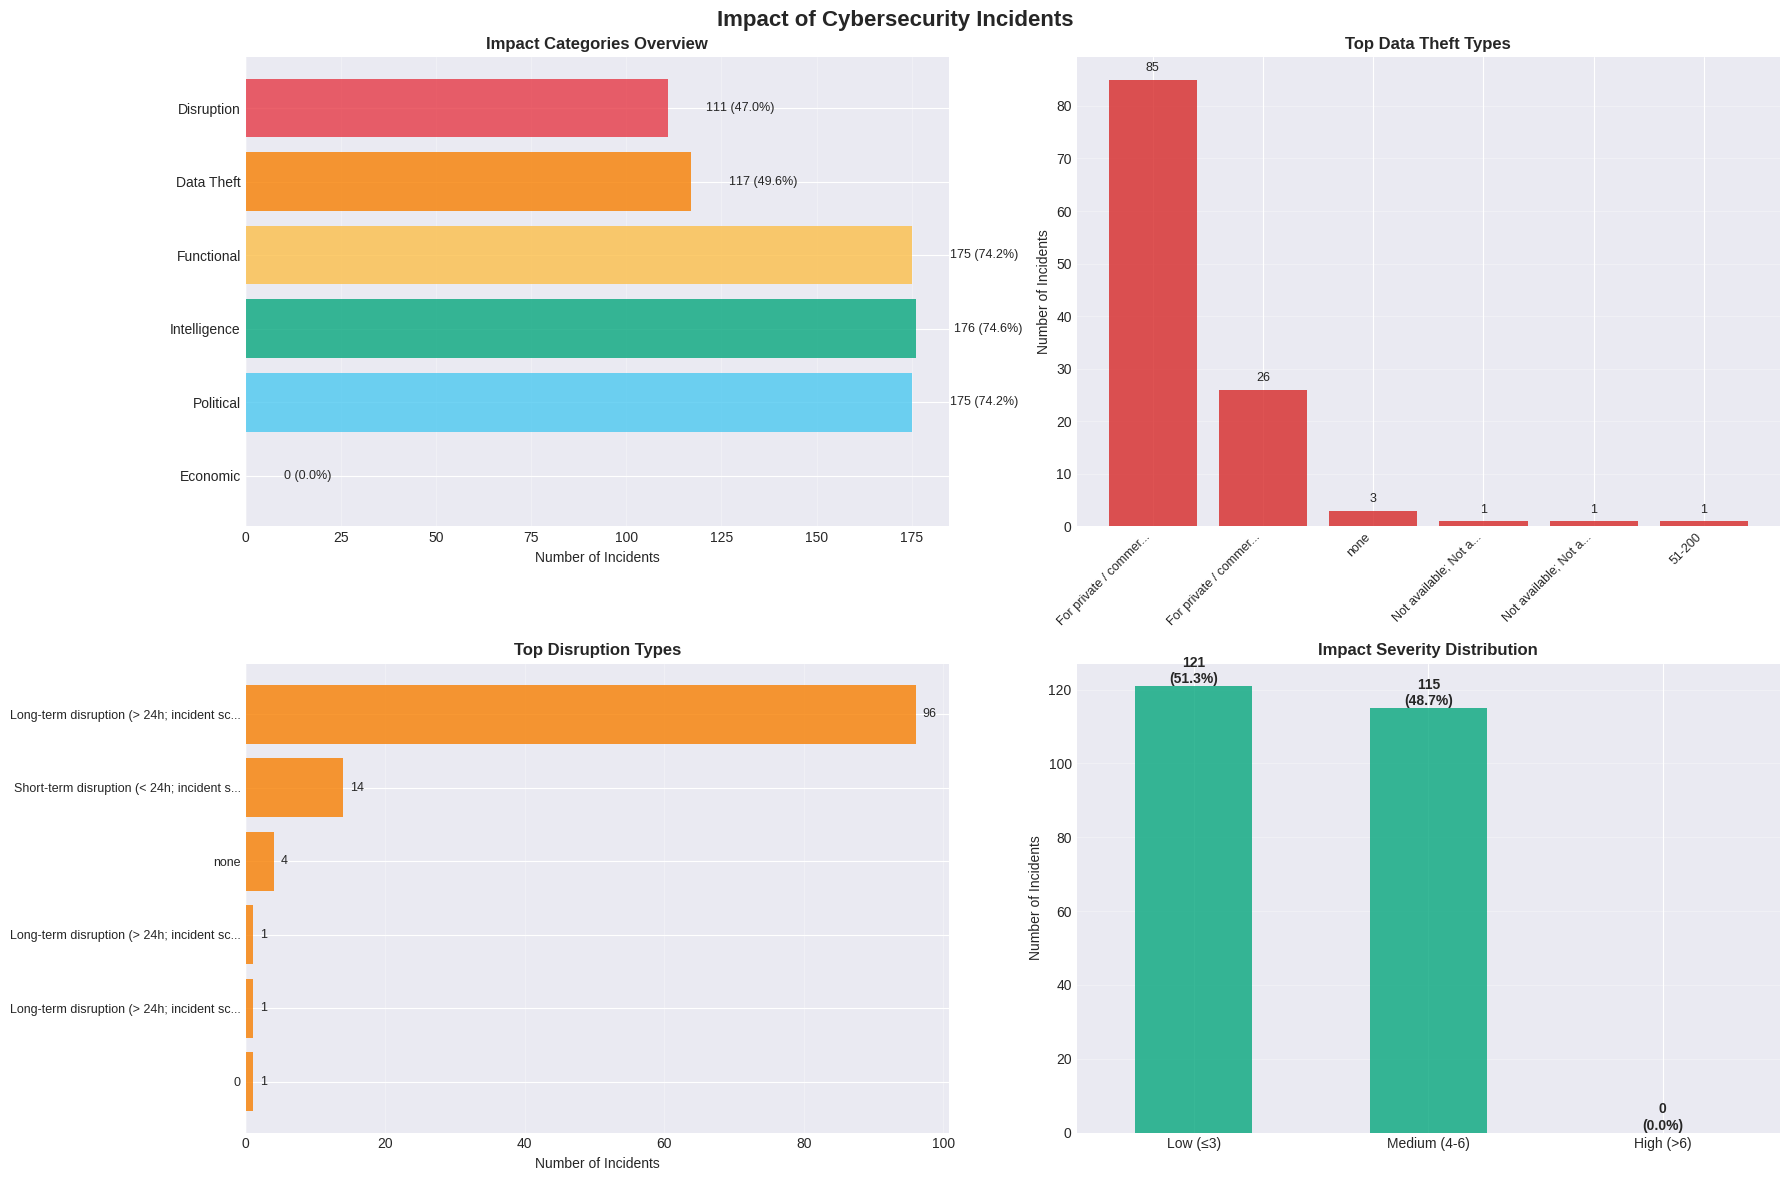

In [40]:


fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Impact of Cybersecurity Incidents',
             fontsize=16, fontweight='bold')

# 1. Impact Categories Overview
impact_data = pd.DataFrame({
    'Impact Type': ['Disruption', 'Data Theft', 'Functional', 'Intelligence', 'Political', 'Economic'],
    'Count': [
        (df_imputed['has_disruption'] == 'TRUE').sum(),
        (df_imputed['data_theft'] != 'Not available').sum(),
        (df_imputed['functional_impact'] != 'Not available').sum(),
        (df_imputed['intelligence_impact'] != 'Not available').sum(),
        (df_imputed['political_impact_affected_entities'] != 'Not available').sum(),
        (df_imputed['economic_impact'] != 'Not available').sum()
    ]
})

bars = axes[0, 0].barh(impact_data['Impact Type'], impact_data['Count'],
                       color=['#E63946', '#F77F00', '#FCBF49', '#06A77D', '#4CC9F0', '#7209B7'],
                       alpha=0.8)
axes[0, 0].set_xlabel('Number of Incidents')
axes[0, 0].set_title('Impact Categories Overview', fontsize=12, fontweight='bold')
axes[0, 0].invert_yaxis()
axes[0, 0].grid(True, alpha=0.3, axis='x')

for i, v in enumerate(impact_data['Count']):
    axes[0, 0].text(v + 10, i, f"{v} ({v/len(df_imputed)*100:.1f}%)",
                    va='center', fontsize=9)

# 2. Top Data Theft Types
data_theft_top = df_imputed[df_imputed['data_theft'] != 'Not available']['data_theft'].value_counts().head(8)
axes[0, 1].bar(range(len(data_theft_top)), data_theft_top.values,
               color='#D62828', alpha=0.8)
axes[0, 1].set_xticks(range(len(data_theft_top)))
axes[0, 1].set_xticklabels([label[:20] + '...' if len(label) > 20 else label
                            for label in data_theft_top.index],
                           rotation=45, ha='right', fontsize=9)
axes[0, 1].set_ylabel('Number of Incidents')
axes[0, 1].set_title('Top Data Theft Types', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='y')

for i, v in enumerate(data_theft_top.values):
    axes[0, 1].text(i, v + 1, str(v), ha='center', va='bottom', fontsize=9)

# 3. Disruption Types Distribution
disruption_types = df_imputed[df_imputed['disruption'] != 'Not available']['disruption'].value_counts().head(8)
axes[1, 0].barh(range(len(disruption_types)), disruption_types.values,
                color='#F77F00', alpha=0.8)
axes[1, 0].set_yticks(range(len(disruption_types)))
axes[1, 0].set_yticklabels([label[:40] + '...' if len(label) > 40 else label
                            for label in disruption_types.index], fontsize=9)
axes[1, 0].set_xlabel('Number of Incidents')
axes[1, 0].set_title('Top Disruption Types', fontsize=12, fontweight='bold')
axes[1, 0].invert_yaxis()
axes[1, 0].grid(True, alpha=0.3, axis='x')

for i, v in enumerate(disruption_types.values):
    axes[1, 0].text(v + 1, i, str(v), va='center', fontsize=9)

# 4. Impact Severity Matrix
impact_severity = pd.DataFrame({
    'Low Impact': [
        (df_imputed['unweighted_cyber_intensity'] <= 3).sum()
    ],
    'Medium Impact': [
        ((df_imputed['unweighted_cyber_intensity'] > 3) &
         (df_imputed['unweighted_cyber_intensity'] <= 6)).sum()
    ],
    'High Impact': [
        (df_imputed['unweighted_cyber_intensity'] > 6).sum()
    ]
}, index=['Incidents'])

impact_severity.T.plot(kind='bar', ax=axes[1, 1],
                       color=['#06A77D', '#F77F00', '#E63946'],
                       alpha=0.8, legend=False)
axes[1, 1].set_title('Impact Severity Distribution', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Number of Incidents')
axes[1, 1].set_xticklabels(['Low (≤3)', 'Medium (4-6)', 'High (>6)'], rotation=0)
axes[1, 1].grid(True, alpha=0.3, axis='y')

for i, bar in enumerate(axes[1, 1].patches):
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height)}\n({height/len(df_imputed)*100:.1f}%)',
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


In [43]:


# 1. Response Rate Analysis
total_incidents = len(df_imputed)
incidents_with_political_response = (df_imputed['number_of_political_responses'] > 0).sum()
incidents_with_legal_response = (df_imputed['number_of_legal_responses'] > 0).sum()
incidents_with_any_response = ((df_imputed['number_of_political_responses'] > 0) |
                                (df_imputed['number_of_legal_responses'] > 0)).sum()
incidents_with_no_response = total_incidents - incidents_with_any_response

print(f"Incidents with Political Response: {incidents_with_political_response} ({incidents_with_political_response/total_incidents*100:.1f}%)")
print(f"Incidents with Legal Response: {incidents_with_legal_response} ({incidents_with_legal_response/total_incidents*100:.1f}%)")
print(f"Incidents with ANY Response: {incidents_with_any_response} ({incidents_with_any_response/total_incidents*100:.1f}%)")
print(f"Incidents with NO Response: {incidents_with_no_response} ({incidents_with_no_response/total_incidents*100:.1f}%)")

avg_political = df_imputed['number_of_political_responses'].mean()
avg_legal = df_imputed['number_of_legal_responses'].mean()

print(f"Political Responses: {avg_political:.2f}")
print(f"Legal Responses: {avg_legal:.2f}")

political_response_types = df_imputed[df_imputed['political_response_type'] != 'Not available']['political_response_type'].value_counts()
print(political_response_types.head(8))

legal_response_types = df_imputed[df_imputed['legal_response_type'] != 'Not available']['legal_response_type'].value_counts()
print(legal_response_types.head(8))

# 4. Attribution Capability
incidents_with_attribution = (df_imputed['number_of_attributions'] != '0').sum()
attribution_rate = (incidents_with_attribution / total_incidents) * 100

print(f"Incidents with Attribution: {incidents_with_attribution} ({attribution_rate:.1f}%)")
print(f"Average attributions per incident: {pd.to_numeric(df_imputed['number_of_attributions'], errors='coerce').mean():.2f}")

status_counts = df_imputed['status'].value_counts()
print(status_counts)

closed_incidents = status_counts.get('Closed', 0)
closure_rate = (closed_incidents / total_incidents) * 100
print(f"\nClosure Rate: {closure_rate:.1f}%")

# 6. Readiness by Region
regional_response = df_viz.groupby('receiver_region').agg({
    'number_of_political_responses': lambda x: (x > 0).sum(),
    'number_of_legal_responses': lambda x: (x > 0).sum()
}).sum(axis=1).sort_values(ascending=False).head(10)
print(regional_response)


Incidents with Political Response: 31 (13.1%)
Incidents with Legal Response: 48 (20.3%)
Incidents with ANY Response: 73 (30.9%)
Incidents with NO Response: 163 (69.1%)
Political Responses: 0.15
Legal Responses: 0.20
political_response_type
State Actors: Preventive measures                                                                                 9
State Actors: Stabilizing measures                                                                                7
State Actors: Executive reactions                                                                                 2
EU member states: Stabilizing measures                                                                            1
State Actors: Stabilizing measures; State Actors: Stabilizing measures; State Actors: Legislative reactions       1
Hijacking, system misuse, e.g., through data theft and / or disruption (incident scores 2 points in intensity)    1
State Actors: Preventive measures; State Actors: Preventive meas

In [46]:
high_intensity_incidents = (df_imputed['unweighted_cyber_intensity'] > 6).sum()
medium_intensity_incidents = ((df_imputed['unweighted_cyber_intensity'] > 3) &
                               (df_imputed['unweighted_cyber_intensity'] <= 6)).sum()
low_intensity_incidents = (df_imputed['unweighted_cyber_intensity'] <= 3).sum()
print(f"High Severity (>6): {high_intensity_incidents} incidents ({high_intensity_incidents/len(df_imputed)*100:.1f}%)")
print(f"Medium Severity (4-6): {medium_intensity_incidents} incidents ({medium_intensity_incidents/len(df_imputed)*100:.1f}%)")
print(f"Low Severity (≤3): {low_intensity_incidents} incidents ({low_intensity_incidents/len(df_imputed)*100:.1f}%)")
prevented_major_impact = (df_imputed['has_disruption'] == 'FALSE').sum()
failed_prevention = (df_imputed['has_disruption'] == 'TRUE').sum()
print(f"Incidents WITHOUT Disruption: {prevented_major_impact} ({prevented_major_impact/len(df_imputed)*100:.1f}%)")
print(f"Incidents WITH Disruption: {failed_prevention} ({failed_prevention/len(df_imputed)*100:.1f}%)")
with_data_theft = (df_imputed['data_theft'] != 'Not available').sum()
print(f"Incidents WITHOUT Data Theft: {no_data_theft} ({no_data_theft/len(df_imputed)*100:.1f}%)")
print(f"Incidents WITH Data Theft: {with_data_theft} ({with_data_theft/len(df_imputed)*100:.1f}%)")
quick_response = ((df_imputed['number_of_political_responses'] > 0) |
                  (df_imputed['number_of_legal_responses'] > 0)).sum()
response_effectiveness = (quick_response / len(df_imputed)) * 100
print(f"Incidents with Response Actions: {quick_response} ({response_effectiveness:.1f}%)")
print(f"Incidents without Response: {len(df_imputed) - quick_response} ({100-response_effectiveness:.1f}%)")
successful_attribution = (df_imputed['attribution_type'] != 'Not available').sum()
attribution_effectiveness = (successful_attribution / len(df_imputed)) * 100
print(f"Successfully Attributed: {successful_attribution} ({attribution_effectiveness:.1f}%)")
print(f"Not Attributed: {len(df_imputed) - successful_attribution} ({100-attribution_effectiveness:.1f}%)")
top_attribution_basis = df_imputed[df_imputed['attribution_basis'] != 'Not available']['attribution_basis'].value_counts().head(5)
print(top_attribution_basis)
yearly_disruption = df_viz.groupby('year').agg({
    'has_disruption': lambda x: (x == 'TRUE').sum() / len(x) * 100
}).tail(5)
yearly_disruption.columns = ['Disruption Rate (%)']
print(yearly_disruption.round(2))

High Severity (>6): 0 incidents (0.0%)
Medium Severity (4-6): 115 incidents (48.7%)
Low Severity (≤3): 121 incidents (51.3%)
Incidents WITHOUT Disruption: 124 (52.5%)
Incidents WITH Disruption: 111 (47.0%)
Incidents WITHOUT Data Theft: 119 (50.4%)
Incidents WITH Data Theft: 117 (49.6%)
Incidents with Response Actions: 73 (30.9%)
Incidents without Response: 163 (69.1%)
Successfully Attributed: 113 (47.9%)
Not Attributed: 123 (52.1%)
attribution_basis
Attacker confirms                                    48
IT-security community attributes attacker            24
Media-based attribution                               6
Receiver attributes attacker                          6
Attribution by receiver government / state entity     4
Name: count, dtype: int64
        Disruption Rate (%)
year                       
2021.0                14.29
2022.0                45.45
2023.0                51.76
2024.0                56.58
2025.0                31.71


In [50]:

zero_day_usage = df_imputed['zero_days'].value_counts()
print(zero_day_usage.head(5))
incidents_with_zero_day = (df_imputed['zero_days'] != 'Not available').sum()
print(f"\nIncidents using zero-days: {incidents_with_zero_day} ({incidents_with_zero_day/len(df_imputed)*100:.1f}%)")


user_interaction = df_imputed['user_interaction'].value_counts()
print(user_interaction.head(5))

attack_types = df_imputed['incident_type'].value_counts().head(10)
print(attack_types)

zero_days
No               199
Not available     27
Yes                5
Unknown            2
No; No             1
Name: count, dtype: int64

Incidents using zero-days: 209 (88.6%)
user_interaction
Not available                        233
Required                               2
No system interference/disruption      1
Name: count, dtype: int64
incident_type
Data theft; Hijacking with Misuse                            45
Disruption; Hijacking with Misuse; Ransomware                34
Disruption; Hijacking with Misuse                            27
Data theft; Disruption; Hijacking with Misuse; Ransomware    22
Hijacking without Misuse                                     19
Data theft; Hijacking with Misuse; Ransomware                17
Disruption                                                   14
Hijacking with Misuse                                         9
Data theft; Disruption; Hijacking with Misuse                 8
Data theft & Doxing; Hijacking with Misuse; Ransomware        7

In [56]:


first_year = yearly_counts.iloc[0]
last_year = yearly_counts.iloc[-1]
growth_rate = ((last_year - first_year) / first_year) * 100
print(f"\nGrowth from {yearly_counts.index[0]:.0f} to {yearly_counts.index[-1]:.0f}: {growth_rate:.1f}%")
print(f"Peak year: {yearly_counts.idxmax():.0f} with {yearly_counts.max()} incidents")
print(f"Lowest year: {yearly_counts.idxmin():.0f} with {yearly_counts.min()} incidents")


monthly_counts = df_viz.groupby('month').size().sort_index()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for month, count in monthly_counts.items():
    print(f"{month_names[int(month)-1]}: {count} incidents")

print(f"\nPeak month: {month_names[int(monthly_counts.idxmax())-1]} with {monthly_counts.max()} incidents")
print(f"Lowest month: {month_names[int(monthly_counts.idxmin())-1]} with {monthly_counts.min()} incidents")

recent_years = df_viz[df_viz['year'] >= 2023]
recent_yearly = recent_years.groupby('year').size()
print(recent_yearly)

recent_monthly = recent_years.groupby('year_month').size()
print(f"\nAverage incidents per month (recent): {recent_monthly.mean():.1f}")



Growth from 2009 to 2025: 1950.0%
Peak year: 2023 with 85 incidents
Lowest year: 2011 with 1 incidents
Jan: 36 incidents
Feb: 27 incidents
Mar: 15 incidents
Apr: 16 incidents
May: 21 incidents
Jun: 16 incidents
Jul: 18 incidents
Aug: 18 incidents
Sep: 22 incidents
Oct: 18 incidents
Nov: 12 incidents
Dec: 13 incidents

Peak month: Jan with 36 incidents
Lowest month: Nov with 12 incidents
year
2023.0    85
2024.0    76
2025.0    41
dtype: int64

Average incidents per month (recent): 5.9


In [59]:

# 1. Overall Response Statistics
print(f"\nOVERALL RESPONSE STATISTICS:")
total_incidents = len(df_imputed)
political_responses = (df_imputed['number_of_political_responses'] > 0).sum()
legal_responses = (df_imputed['number_of_legal_responses'] > 0).sum()
both_responses = ((df_imputed['number_of_political_responses'] > 0) &
                  (df_imputed['number_of_legal_responses'] > 0)).sum()
no_responses = ((df_imputed['number_of_political_responses'] == 0) &
                (df_imputed['number_of_legal_responses'] == 0)).sum()

print(f"Political Responses: {political_responses} ({political_responses/total_incidents*100:.1f}%)")
print(f"Legal Responses: {legal_responses} ({legal_responses/total_incidents*100:.1f}%)")
print(f"Both Responses: {both_responses} ({both_responses/total_incidents*100:.1f}%)")
print(f"No Responses: {no_responses} ({no_responses/total_incidents*100:.1f}%)")

# 2. Political Response Types
print(f"\nPOLITICAL RESPONSE TYPES (Top 10):")
political_types = df_imputed[df_imputed['political_response_type'] != 'Not available']['political_response_type'].value_counts().head(10)
print(political_types)

# 3. Legal Response Types
print(f"\nLEGAL RESPONSE TYPES (Top 10):")
legal_types = df_imputed[df_imputed['legal_response_type'] != 'Not available']['legal_response_type'].value_counts().head(10)
print(legal_types)

# 4. Top Responding Countries - Political
print(f"\n TOP COUNTRIES WITH POLITICAL RESPONSES:")
political_countries = df_imputed[df_imputed['political_response_country'] != 'Not available']['political_response_country'].value_counts().head(10)
print(political_countries)

# 5. Top Responding Countries - Legal
print(f"\n TOP COUNTRIES WITH LEGAL RESPONSES:")
legal_countries = df_imputed[df_imputed['legal_response_country'] != 'Not available']['legal_response_country'].value_counts().head(10)
print(legal_countries)

# 6. State Responsibility Indicators
print(f"\n STATE RESPONSIBILITY INDICATORS:")
state_responsibility = df_imputed['state_responsibility_indicator'].value_counts()
print(state_responsibility.head(5))

# 7. International Law Breach Indicators
print(f"\n INTERNATIONAL LAW BREACH INDICATORS:")
il_breach = df_imputed['IL_breach_indicator'].value_counts()
print(il_breach.head(5))


OVERALL RESPONSE STATISTICS:
Political Responses: 31 (13.1%)
Legal Responses: 48 (20.3%)
Both Responses: 6 (2.5%)
No Responses: 163 (69.1%)

POLITICAL RESPONSE TYPES (Top 10):
political_response_type
State Actors: Preventive measures                                                                                 9
State Actors: Stabilizing measures                                                                                7
State Actors: Executive reactions                                                                                 2
EU member states: Stabilizing measures                                                                            1
State Actors: Stabilizing measures; State Actors: Stabilizing measures; State Actors: Legislative reactions       1
Hijacking, system misuse, e.g., through data theft and / or disruption (incident scores 2 points in intensity)    1
State Actors: Preventive measures; State Actors: Preventive measures                                   